# Проект : Исследование списка гипотез для увеличения выручки интернет-магазина.

# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Описание данных

**hypothesis.csv хранит следующие данные:**
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**orders.csv хранит следующие данные:**
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**visitors.csv хранит следующие данные:**
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Задачи исследования

# Изучение общей информации
- загрузить данные из файлов в датафреймы
- изучить общую информацию о полученных датафреймах

# Предобработка данных

**Замена названия столбцов**
- определить, в каких столбцах есть необходимость заменить регистр
- произвести замену

**Обработка дубликатов**
- проанализировать столбцы с данными
- произвести устранение дубликатов

**Изменение типов данных**
- проанализировать столбцы с данными
- преобразовать тип данных по необходимости

**Определим максимальные и минимальные даты проведения эксперимента**
- проанализировать полученные даты
- преобразовать данные по необходимости


# Приоритизация гипотез
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

# Анализ A/B-теста
- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

## Изучение общей информации

Импортирую библиотеки. Считываю данные из csv-файлов в датафреймы.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [3]:
try:
    hypothesis = pd.read_csv('hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [4]:
try:
    orders = pd.read_csv('orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')

In [5]:
try:
    visitors = pd.read_csv('visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')

Просматриваю информацию в датафреймах

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 120)

In [7]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [8]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Вывожу основную информацию о датафрейме с помощью метода info()

In [10]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Вывожу основную информацию о датафрейме с помощью метода describe().

In [13]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


После первичного осмотра, обнаружено следуещее:
- необходимо поменять регистр в названиях столбцов
- проверить на наличие дубликатов
- привести столбцы с датами к нужному формату
- пропусков не обнаружено

## Предобработка данных

### Замена регистра

In [14]:
hypothesis.columns = hypothesis.columns.str.lower()

In [15]:
hypothesis.head(5)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [16]:
orders.columns = orders.columns.str.lower()

In [17]:
orders.head(5)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


### Обработка дубликатов

Проверяем наличие дубликатов

In [18]:
hypothesis.duplicated().sum()

0

In [19]:
orders.duplicated().sum()

0

In [20]:
visitors.duplicated().sum()

0

Проверяем есть ли пользователи, которые попали в обе группы

In [21]:
orders.groupby('visitorid').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

### Изменение типов данных

Преобразуем временные данные

In [22]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

### Определим максимальные и минимальные даты проведения эксперимента

In [23]:
print('Минимальная дата датафрейма orders:', (orders['date']).min())
print('Максимальная дата датафрейма orders:', (orders['date']).max())

Минимальная дата датафрейма orders: 2019-08-01 00:00:00
Максимальная дата датафрейма orders: 2019-08-31 00:00:00


In [24]:
print('Минимальная дата датафрейма visitors:', (visitors['date']).min())
print('Максимальная дата датафрейма visitors:', (visitors['date']).max())

Минимальная дата датафрейма visitors: 2019-08-01 00:00:00
Максимальная дата датафрейма visitors: 2019-08-31 00:00:00


В результате проведения предообработки, проведены следующие действия и получены результаты
- заменен регистр с столбцах в датафрейме hypothesis и orders
- проведена проверка дубликатов
- были заменены типы данных в столбцах с датой и временем в датафреймах orders и visitors
- определены максимальные и минимальные даты проведения эксперимента

## Приоритизация гипотез

### Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

In [25]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
round((hypothesis.sort_values(by='ICE', ascending=False)), 2)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

In [26]:
hypothesis['RICE'] = (hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach']) / hypothesis['efforts']
round((hypothesis.sort_values(by='RICE', ascending=False)), 2)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


 ### Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Наиболее приоритетными при использовании фреймворка **ICE** оказались следующие гипотезы:
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию-
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Наиболее приоритетными при использовании фреймворка **RICE** оказались следующие гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- Запустить акцию, дающую скидку на товар в день рождения

При этом, и в **ICE** и в **RICE**, в пятерку лучших попали одни и те же гипотезы,  но с разными приоритетами. При использование фреймофрка **RISE**, учатсвует дополнительный параметр, **Reach** — охват пользователей по 10-балльной шкале, именно он оказал влияние на изменение приоритета гипотез.

Для проведения **A/B** теста нужно использовать гипотезы **RICE**, большего приоритета:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

## Анализ A/B-теста

### Построить график кумулятивной выручки по группам. Сделать выводы и предположения.

In [27]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [28]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [29]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [30]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

In [31]:
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [32]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

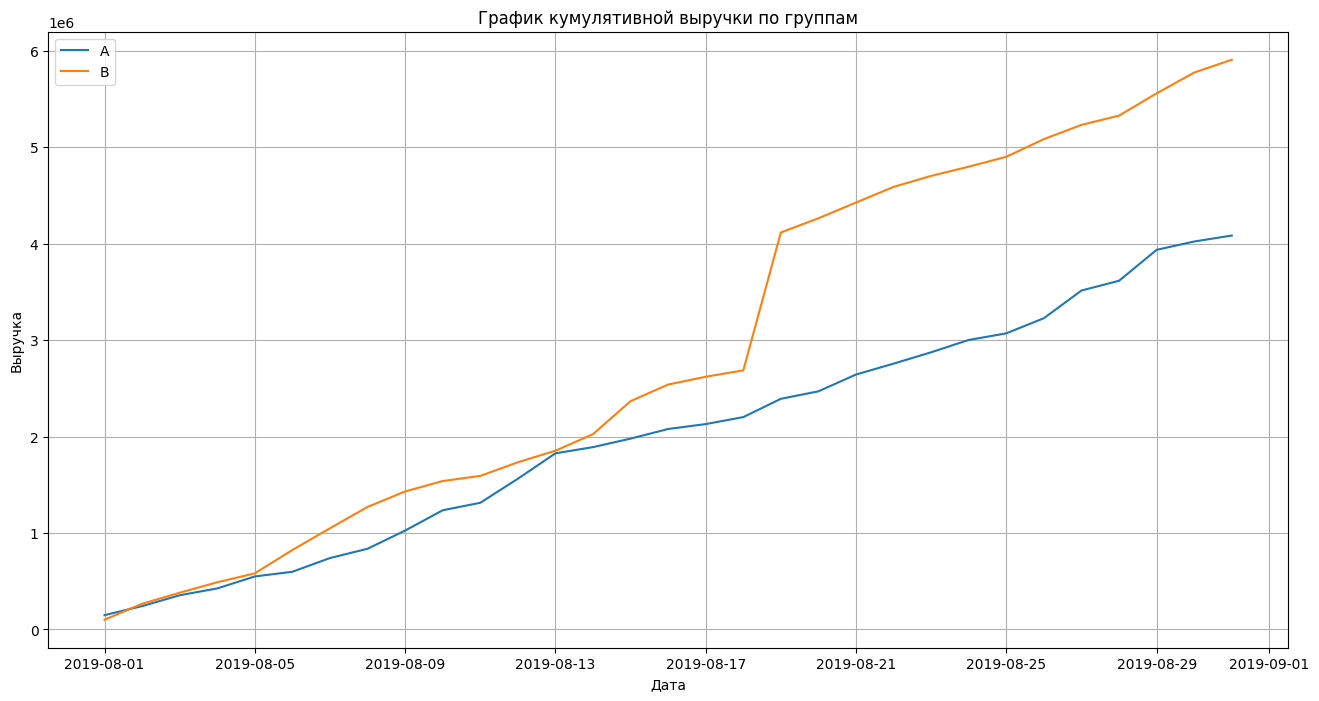

In [33]:
plt.figure(figsize=(16, 8))
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend();

Выручка увеличивает в обеих группах в течении всего теста. До 17го августа графики выручки были почти одинаковыми однако в районе 17 августа, выручка группы В резко выросла, и превосходила выручку группы А до конца теста. Скорее всего, в этот период были, какие то аномальные заказы, которые так и повлияли на результат. Требуется дополнительный анализ выбросов.

### Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.

In [34]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

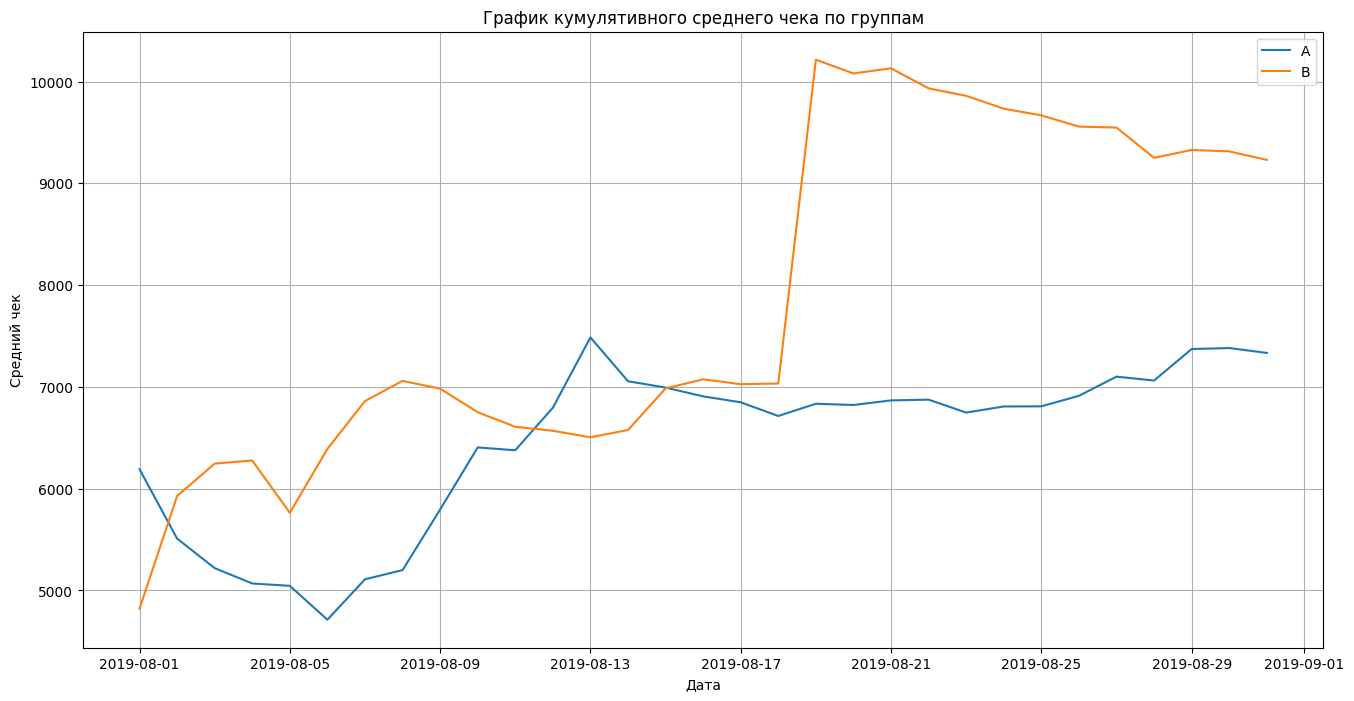

In [35]:
plt.figure(figsize=(16, 8))
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

Средний чек для групп А и В до 17 августа растет, меняясь, иногда лучше результат у А иногда у В. 17 августа у группы В резки скачек вверх, а потом начинается медленный спад до конца теста. У группы А наблюдается постепенный рост. Вывод, как и по первому графику, скорее всего, в этот период были, какие то аномальные заказы, которые так и повлияли на результат. Требуется дополнительный анализ выбросов.

### Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

In [36]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

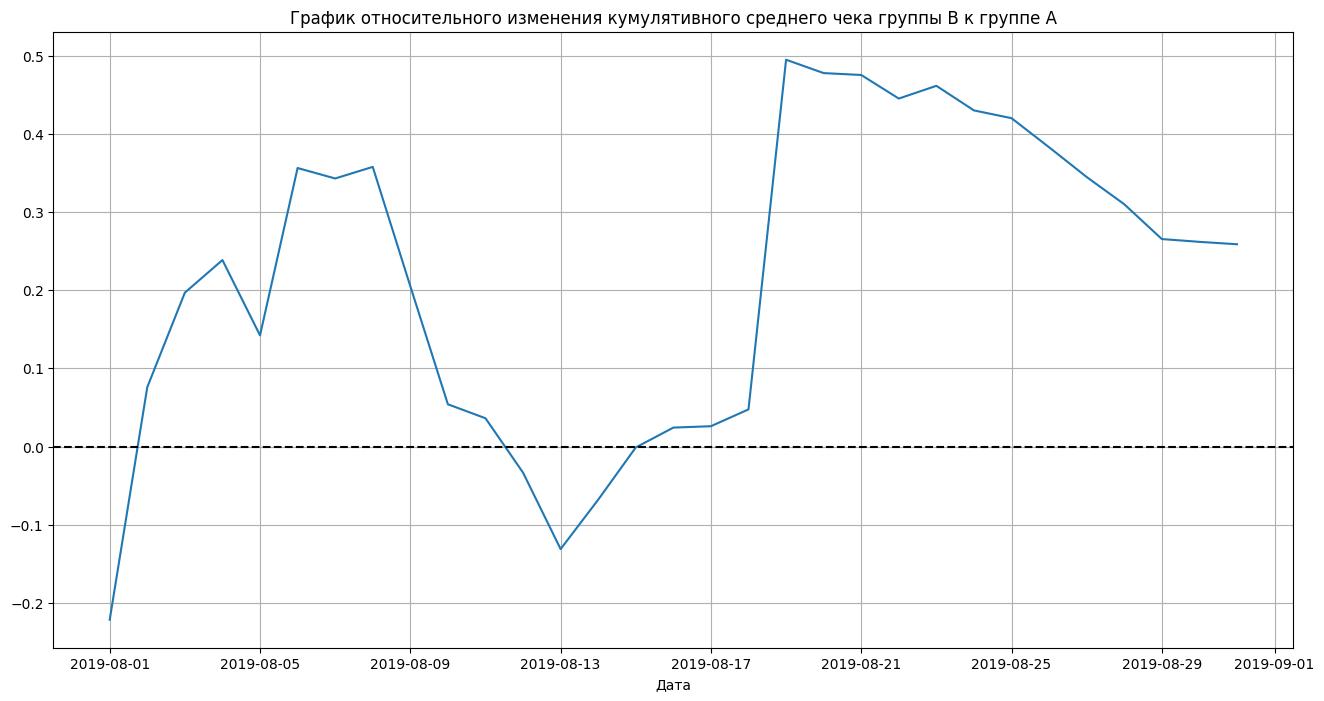

In [37]:
plt.figure(figsize=(16, 8))
plt.grid()
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--'); 

На графике видны резкие скачки в некоторые из дат. По всей видимости, в эти даты были совершены аномальные покупки в группе В.

### Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.

In [38]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [39]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

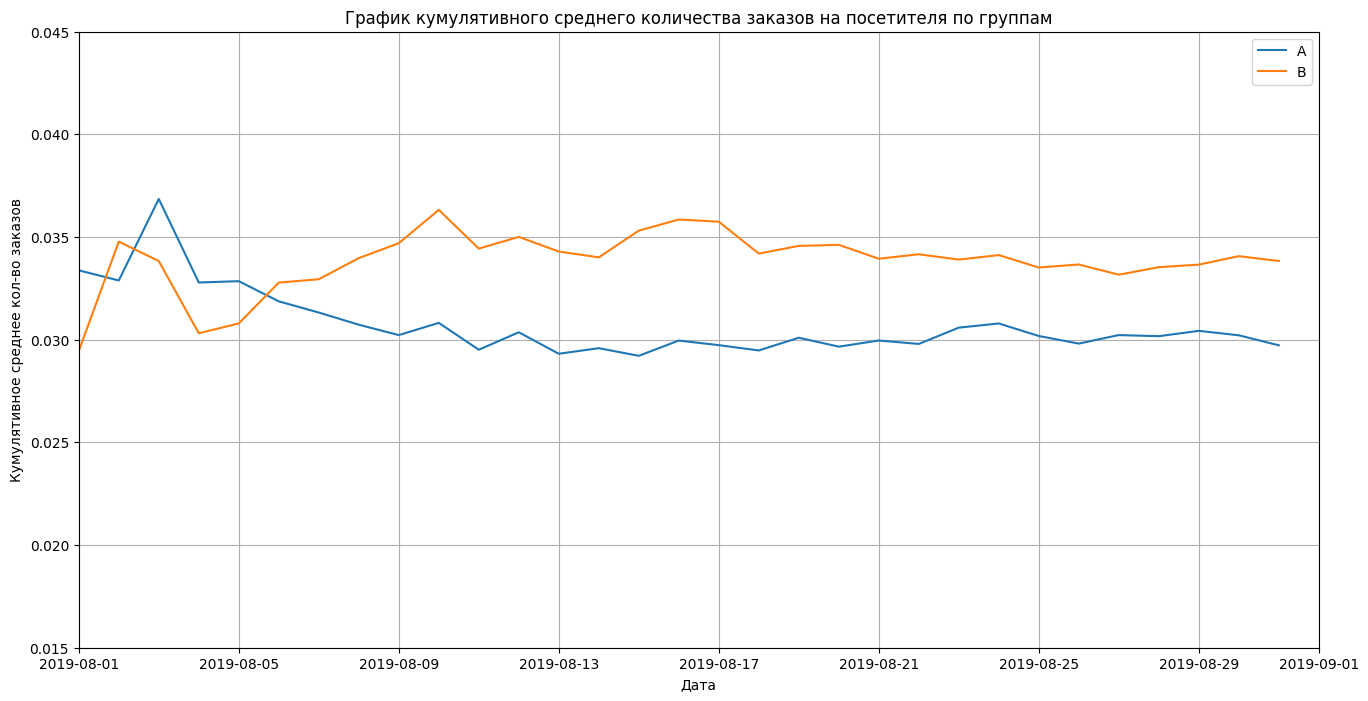

In [40]:
plt.figure(figsize=(16, 8))
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее кол-во заказов')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.015, 0.045]);

До 5го августа среднее кол-во заказов развивались одинаково, с небольшим опережением группы А. С со августа, значения В возросла а значения А, снизились. После этого А и В развивались равномерно. В результате значения В показали лучшие результаты чем А.

### Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.

In [41]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

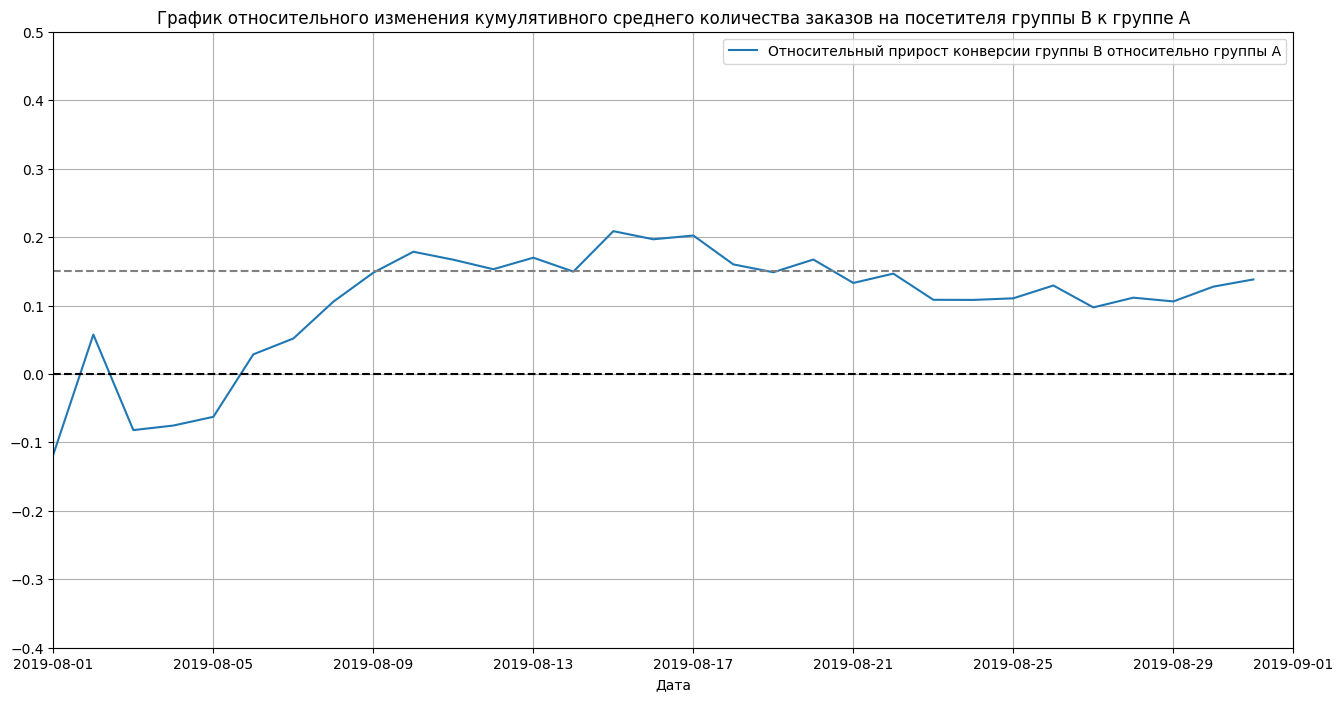

In [42]:
plt.figure(figsize=(16, 8))
plt.grid()
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend();
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.4, 0.5]);

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Рост происходил до 17го августа, после значения относительного изменения кумулятивного среднего количества заказов В немного пошла на спад, но потом выровнялась. В результате группа В показала результаты лучше группы А. Необходимо проанализировать аномалии.

### Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.

In [43]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsers.columns = ['visitorid', 'orders']

In [44]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

       visitorid  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


In [45]:
x_values = pd.Series(range(0, len(ordersByUsers)))

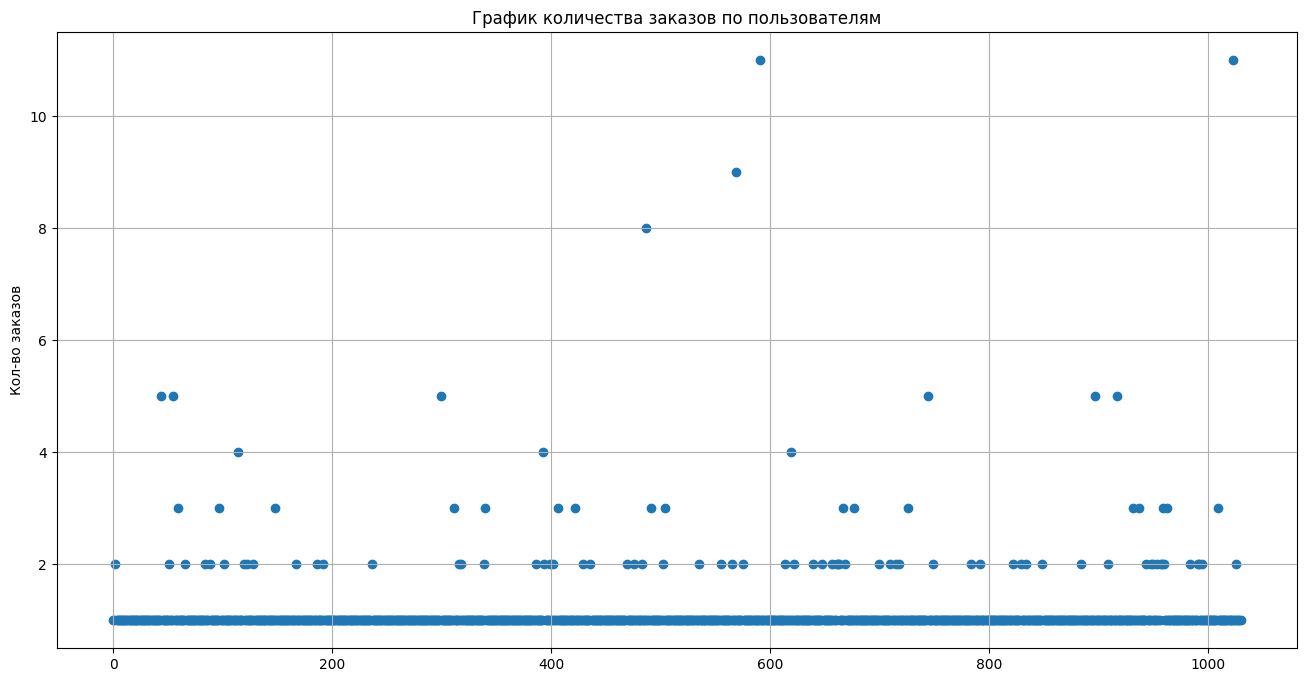

In [46]:
plt.figure(figsize=(16, 8))
plt.grid()
plt.ylabel('Кол-во заказов')
plt.title('График количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders']);

Из графика видно, что большинство пользователей оформили всего один заказ, есть какой то процент пользователей кто оформил два, и совсем небольшой процент, кто оформил больше двух заказов.

### Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберать границу для определения аномальных пользователей.

In [47]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


In [48]:
percentile_orders = list(np.percentile(ordersByUsers['orders'], [95, 99]))

5% пользователей сделали 2 заказа и больше, и всего 1% сделали больше 4 заказа и больше. Выберем верхней границей числа заказов 2, все остальные будем считать аномалиями.

### Построить точечный график стоимостей заказов. Сделать выводы и предположения.

In [49]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

      transactionid   visitorid       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


In [50]:
x_values = pd.Series(range(0, len(orders['revenue'])))

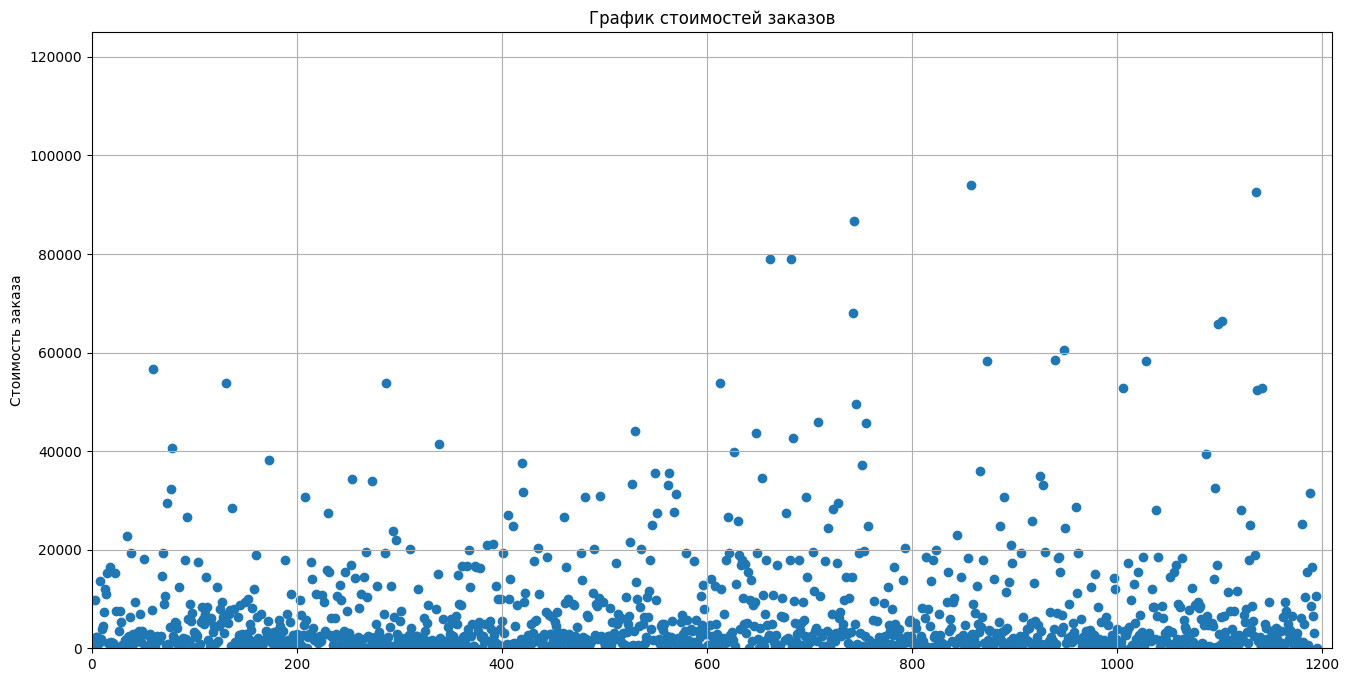

In [51]:
plt.figure(figsize=(16, 8))
plt.grid()
plt.ylabel('Стоимость заказа')
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1210, 0, 125000]);

По графику видно, что есть несколько заказов выбивающихся из основной массы, согласно таблице выше, они принадлежат группе В.  Большая часть заказов находится в пределах 50000 усл.ед.

### Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.

In [52]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


In [53]:
percentile_revenue = list(np.percentile(orders['revenue'], [95, 99]))

 Не боллее 5% заказов дороже 28000 усл.ед. и не более 1% заказов дороже 58000 усл.ед. Выберем верхней границей стоимости заказов 28000, все остальные будем считать аномалиями.

### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.

In [54]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

- Нулевая гипотеза H0: Статистически значимых различий в среднем числе заказов между группами нет
- Альтернативная гипотеза H1: Статистически значимые различия в среднем числе заказов между группами имеются
- alpha = 0.05
- Используем Непараметрический тест Уилкоксона-Манна-Уитни, с методом st.mannwhitneyu(), проранжируем две выборки по порядку от меньшего к большему и сравним ранги одних и тех же значений, попавших в обе выборки.

In [55]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [56]:
print('P-value:',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное различие среднего количества заказов на посетителя', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.01679
Относительное различие среднего количества заказов на посетителя 0.138


p-value = 0.01679 меньше 0.05. Значит, нулевую гипотезу о том что, статистически значимых различий в среднем числе заказов между группами нет, **ОТВЕРГАЕМ**. Относительный прирост среднего количеста заказов на посетителя группы В к группе А равен 13.8%.

### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

- Нулевая гипотеза H0: Статистически значимых различий в среднем чеке между группами нет
- Альтернативная гипотеза H1: Статистически значимые различия в среднем чеке между группами имеются
- alpha = 0.05
- Используем Непараметрический тест Уилкоксона-Манна-Уитни, с методом st.mannwhitneyu(), проранжируем две выборки по порядку от меньшего к большему и сравним ранги одних и тех же значений, попавших в обе выборки.

In [57]:
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие среднего чека на посетителя', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.729
Относительное различие среднего чека на посетителя 0.259


P-value значительно больше 0.05. Значит, гипотезу, что в среднем чеке есть различия **НЕ ОТВЕРГАЕМ**. Различие между средними чеками сегментов составляет 25.9%.

### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.

- Нулевая гипотеза H0: Статистически значимых различий в среднем числе заказов между группами нет
- Альтернативная гипотеза H1: Статистически значимые различия в среднем числе заказов между группами имеются
- alpha = 0.05
- Используем Непараметрический тест Уилкоксона-Манна-Уитни, с методом st.mannwhitneyu(), проранжируем две выборки по порядку от меньшего к большему и сравним ранги одних и тех же значений, попавших в обе выборки.

In [58]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > percentile_orders[0]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > percentile_orders[0]]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > percentile_revenue[0]]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [59]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 


In [60]:
print('P-value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие среднего количества заказов на посетителя', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.01304
Относительное различие среднего количества заказов на посетителя 0.173


Результат по среднему чеку для очищенных данных практически не изменился, нулевая гипотеза по прежнему **ОТВЕРГНУТА**. Поменялось, немного, после очистки, относительный прирост среднего количеста заказов на посетителя группы В к группе А составляет 17.3%.

### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

- Нулевая гипотеза H0: Статистически значимых различий в среднем чеке между группами нет
- Альтернативная гипотеза H1: Статистически значимые различия в среднем чеке между группами имеются
- alpha = 0.05
- Используем Непараметрический тест Уилкоксона-Манна-Уитни, с методом st.mannwhitneyu(), проранжируем две выборки по порядку от меньшего к большему и сравним ранги одних и тех же значений, попавших в обе выборки.

In [61]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие среднего чека на посетителя', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.738
Относительное различие среднего чека на посетителя -0.020


P-value для очищенных данных, остался практически на том же уровне, с небольшой разницей. Нулевую гипотезу **НЕ ОТВЕРГАЕМ**. Что касается, среднего чека, чек группы А стал превосходить чек группы В на 2%, после очистки данных.

### Принять решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

- График по среднему чеку имеет сильный разброс, что свидетельствует о наличии аномалий.
- График различия среднего количества заказов между группами показывает, что результаты группы B лучше группы A. 
- После очистки данных статистически значимому различию по среднему чеку, группа А и В практически сравнялись.
- После очистки данных статистическую значимость различий в среднем количестве заказов, относительный прирост конверсии группы В к конверсии А увеличился с 13.8% до 17.3%.

По результатам теста, тест необходимо остановить и зафиксировать победу группы В.

## Выводы

В рамках проекта был получен, изучен и обработан архив данных интернет - магазина.

Были заменены названия столбцов, заменены типы данных, а также устранены дубликаты.

Были проведены следуюшие исследования:

Приоритизация гипотез и получены следующие рузультаты:

Наиболее приоритетными при использовании фреймворка ICE оказались следующие гипотезы:
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию-
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Наиболее приоритетными при использовании фреймворка RICE оказались следующие гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- Запустить акцию, дающую скидку на товар в день рождения

При этом, и в ICE и в RICE, в пятерку лучших попали одни и те же гипотезы, но с разными приоритетами. При использование фреймофрка RISE, учатсвует дополнительный параметр, Reach — охват пользователей по 10-балльной шкале, именно он оказал влияние на изменение приоритета гипотез.

Для проведения A/B теста нужно использовать гипотезы RICE, большего приоритета:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Анализ A/B-теста и получены следующие рузультаты:
- Выручка увеличивает в обеих группах в течении всего теста. До 17го августа графики выручки были почти одинаковыми однако в районе 17 августа, выручка группы В резко выросла, и превосходила выручку группы А до конца теста.
- Средний чек для групп А и В до 17 августа растет, меняясь, иногда лучше результат у А иногда у В. 17 августа у группы В резки скачек вверх, а потом начинается медленный спад до конца теста. У группы А наблюдается постепенный рост.
- График по среднему чеку имеет сильный разброс, что свидетельствует о наличии аномалий.
- До 5го августа среднее кол-во заказов развивались одинаково, с небольшим опережением группы А. С со августа, значения В возросла а значения А, снизились. После этого А и В развивались равномерно. В результате значения В показали лучшие результаты чем А.
- В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Рост происходил до 17го августа, после значения относительного изменения кумулятивного среднего количества заказов В немного пошла на спад, но потом выровнялась. В результате группа В показала результаты лучше группы А.
- 5% пользователей сделали 2 заказа и больше, и всего 1% сделали больше 4 заказа и больше. Выберем верхней границей числа заказов 2, все остальные будем считать аномалиями.
- Не боллее 5% заказов дороже 28000 усл.ед. и не более 1% заказов дороже 58000 усл.ед. Выберем верхней границей стоимости заказов 28000, все остальные будем считать аномалиями.
- P-value для очищенных данных, остался практически на том же уровне, с небольшой разницей. Нулевую гипотезу НЕ ОТВЕРГАЕМ. Что касается, среднего чека, чек группы А стал превосходить чек группы В на 2%, после очистки данных..
- Результат по среднему чеку для очищенных данных практически не изменился, нулевая гипотеза по прежнему **ОТВЕРГНУТА**. Поменялось, немного, после очистки, относительный прирост среднего количеста заказов на посетителя группы В к группе А составляет 17.3%.
- *По результатам теста, тест необходимо остановить и зафиксировать победу группы В.*

По результатам исследование статистическая значимость достигнута: после очистки данных, относительный прирост среднего количеста заказов на посетителя группы В к группе А составляет 17.3%.